# <b><i>Video Game Sales Prediction Analysis</i></b>
**Created By :** Sai Kiran Sajja (Roll No : 21CSB0A49) <br>
**Gmail :** sk21csb0a49@student.nitw.ac.in <br>
**Date:** November 2, 2023

<hr>

## <b>Introduction</b>

The `Video Game Sales Prediction` project is a comprehensive analysis aimed at understanding and predicting the sales of video games in the dynamic and ever-evolving `gaming industry`. With the rapid growth of this sector, it has become increasingly important for `game developers`, `publishers`, and `stakeholders` to gain insights into the factors influencing a game's commercial success.

This project leverages **`Artificial Intelligence`** and **`Data Analysis`** techniques to predict video game sales based on various game attributes, historical data, and market trends. By utilizing **`Machine Learning`**, we aim to provide a valuable tool for industry professionals and enthusiasts to make data-driven decisions, whether it's for `game development`, `marketing strategies`, or `investment opportunities`.

## **Key Objectives**

1. **Data Exploration and Preprocessing:** The project begins with a detailed exploration of the `dataset`, including `data cleaning`, handling `missing values`, and feature `engineering` to prepare the data for `analysis`.

2. **Genre and Sales Analysis:** We investigate the distribution of `video game genres` and analyze the relationship between `genres` and `global sales`. This `exploration` sheds light on popular game categories and their commercial success.

3. **Correlation Analysis:** We examine the `correlations` between various game attributes to understand which `features` play a significant role in determining `sales`. This `analysis` helps in identifying the factors that strongly impact `sales figures`.

4. **Model Building and Prediction:** Using **`Machine Learning`**, we build a `predictive model` to forecast `video game sales`. We employ the **`XGBoost algorithm`** to develop a model that can make accurate predictions based on the available data.

5. **Model Evaluation:** The project assesses the model's performance by using metrics such as `R-squared`, `Root Mean Squared Error (RMSE)`, and `Mean Absolute Error (MAE)`. These evaluations provide insights into the `accuracy` and `reliability` of the sales predictions.

6. **Additional Visualizations:** Beyond the `predictive model`, we create various `visualizations` to present the `data` in an easily digestible format. These `visualizations` offer a comprehensive understanding of the `dataset` and the model's performance.

The `Video Game Sales` Prediction project serves as a valuable resource for those interested in the `gaming industry`, from `game developers` seeking to understand market trends to `investors` making informed decisions. By harnessing the power of **`Artificial Intelligence`** and **`Data Analysis`**, we aim to provide actionable insights and facilitate more informed `decision-making` in the world of `video game sales`.

## **Video Game Sales Dataset**

The `dataset` used in this project was sourced from **`Kaggle`** and originated from a web scrape of `vgchartz.com`. It provides comprehensive information about `video games`, including their `release` details and `sales figures`. Below are the fields included in the dataset:

- **Name**: The title of the video game.
- **Platform**: The platform on which the game was released (e.g., PC, PS4, etc.).
- **Year_of_Release**: The year in which the game was officially released.
- **Genre**: The genre or category to which the game belongs.
- **Publisher**: The company responsible for publishing the game.
- **NA_Sales**: Sales in North America (in millions).
- **EU_Sales**: Sales in Europe (in millions).
- **JP_Sales**: Sales in Japan (in millions).
- **Other_Sales**: Sales in the rest of the world (in millions).
- **Global_Sales**: The total worldwide sales of the game.
- **Developer**: The entity that developed the game.
- **Rating**: The rating assigned to the game.

This `dataset` serves as the foundation for the `Video Game Sales Prediction` project, allowing us to explore and analyze the factors contributing to the `commercial success` of video games. With this information, we can develop `predictive models` and generate insights for the `gaming industry`.

[Link to the Dataset on Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

# <b>Code</b>
<hr>

## <b>Data Preprocessing</b>
### **Importing the necessary Libraries**
We start by importing the necessary libraries, including `pandas`, `numpy`, `matplotlib`, `seaborn`.<br><br>
There are more imported libraries like `Scikit-Learn`(`SimpleImputer`, `ColumnTransformer`, `OneHotEncoder`, `XGBRegressor`, `r2_score`, `mean_squared_error`, `mean_absolute_error`)  later in the code for data cleaning and regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the dataset from a CSV file**
Here we are loading the data from the data set that we are using for the Prediction Analysis

In [2]:
# Importing the dataset
dataset = pd.read_csv('data.csv')

## **Data Cleaning**
We drop columns `'Year_of_Release'`, `'Developer'`, `'Publisher'`, and `'Platform'` from the dataset as they are not essential for our analysis. This also allows us to reduce the time required to train the model.


In [3]:
# Data Cleaning
# Dropping certain less important attributes and check for the missing values(null values)
dataset.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)
print(dataset.isna().sum())
dataset = dataset.dropna()

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Rating          6769
dtype: int64


## **Data Visualisation**

In [4]:
# game = dataset.groupby("Genre")["Global_Sales"].count().head(10)
game = dataset.groupby("Genre")["Global_Sales"].count()
print(game)

Genre
Action          1663
Adventure        249
Fighting         382
Misc             394
Platform         407
Puzzle           121
Racing           591
Role-Playing     718
Shooter          882
Simulation       301
Sports           965
Strategy         274
Name: Global_Sales, dtype: int64


### **Genre Analysis**
We group the `dataset` by the `Genre` column and count the number of games in each genre, storing this information in the `game` variable.
We create a bar plot to `visualize` the distribution of `game` `genres` and their `global sales`.

In [5]:
plt.style.use('dark_background')

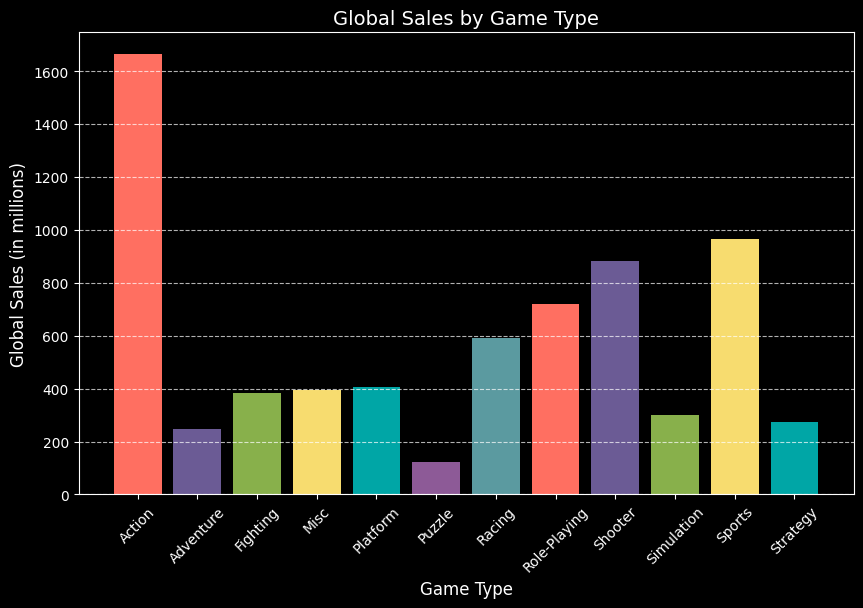

In [6]:
# Define data for the plot
game_types = game.index
global_sales = game.values
# Create a modern color palette
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7DC6F', '#00A6A6', '#8D5A97', '#5B9AA0']
# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
plt.bar(game_types, global_sales, color=colors) # type: ignore
plt.xlabel("Game Type", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Global Sales by Game Type", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for a modern look
plt.show()
# plt.savefig("test.png")

### **Correlation Analysis**
Now let’s have a look at the `correlation` between the features of this `dataset`:

                                    Name     Genre  NA_Sales  EU_Sales  \
0                             Wii Sports    Sports     41.36     28.96   
2                         Mario Kart Wii    Racing     15.68     12.76   
3                      Wii Sports Resort    Sports     15.61     10.93   
6                  New Super Mario Bros.  Platform     11.28      9.14   
7                               Wii Play      Misc     13.96      9.18   
...                                  ...       ...       ...       ...   
16667         E.T. The Extra-Terrestrial    Action      0.01      0.00   
16677     Mortal Kombat: Deadly Alliance  Fighting      0.01      0.00   
16696  Metal Gear Solid V: Ground Zeroes    Action      0.00      0.01   
16700                             Breach   Shooter      0.01      0.00   
16706            STORM: Frontline Nation  Strategy      0.00      0.01   

       JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0          3.77         8.45         

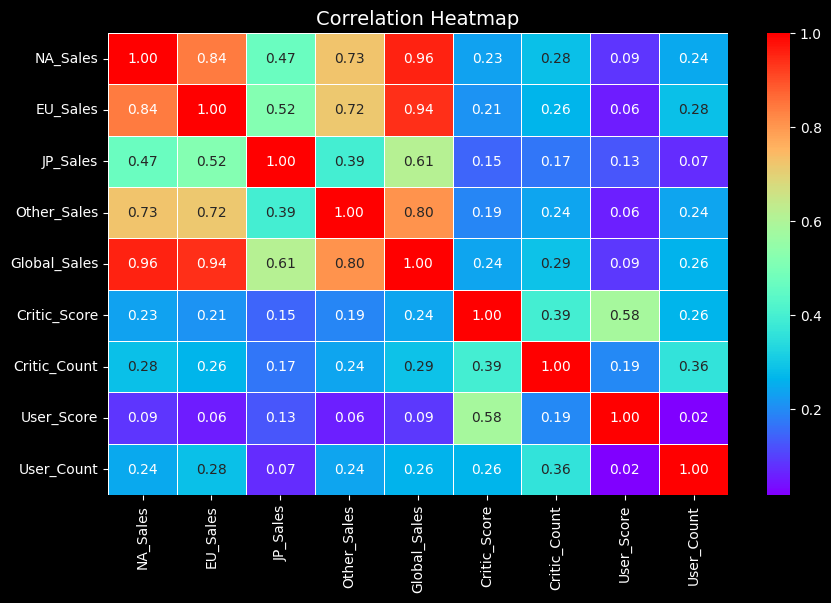

In [7]:
# #Visualization based on correlation of the data
print(dataset)
non_numeric_columns = dataset.select_dtypes(exclude=['float64', 'int64']).columns
data_numeric = dataset.drop(columns=non_numeric_columns)
corr_matrix = data_numeric.corr()
# sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="rainbow", linewidths=0.5) # type: ignore
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## **Training Video Game Sales Prediction Model**

### **Splitting the dataset into Train & Test sets**
- Here now we initialize `'x'`, `'y'`.
- <b>`'x'`</b> is the set of independant variables `NA_SALES`, `EU_SALES`, etc. and <b>`'y'`</b> is the target variable `GLOBAL_SALES`
- We split the data into training and testing sets using the `train_test_split` function from `scikit-learn`.

In [8]:
print(dataset)
x = dataset.iloc[:, :].values
x = np.delete(x, 6, 1)
y = dataset.iloc[:, 6:7].values
# Splitting the dataset into Train and Test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

                                    Name     Genre  NA_Sales  EU_Sales  \
0                             Wii Sports    Sports     41.36     28.96   
2                         Mario Kart Wii    Racing     15.68     12.76   
3                      Wii Sports Resort    Sports     15.61     10.93   
6                  New Super Mario Bros.  Platform     11.28      9.14   
7                               Wii Play      Misc     13.96      9.18   
...                                  ...       ...       ...       ...   
16667         E.T. The Extra-Terrestrial    Action      0.01      0.00   
16677     Mortal Kombat: Deadly Alliance  Fighting      0.01      0.00   
16696  Metal Gear Solid V: Ground Zeroes    Action      0.00      0.01   
16700                             Breach   Shooter      0.01      0.00   
16706            STORM: Frontline Nation  Strategy      0.00      0.01   

       JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0          3.77         8.45         

We save the `names` of the games in both `train` and `test` and remove them before training the model

In [ ]:
# Saving name of the games in training and test set
games_in_training_set = x_train[:, 0]
games_in_test_set = x_test[:, 0]

Drop the `Name` column for training the data

In [ ]:
# Dropping the column that contains the name of the games
x_train = x_train[:, 1:]
x_test = x_test[:, 1:]

### **Imputation**
We use the `SimpleImputer` from `scikit-learn` to fill `missing numerical values` in columns 5, 6, 7, and 8 with their `mean` values.

We fill `missing categorical values` in columns 0 and 9 with `'NA'`.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
x_train[:, [5 ,6, 7, 8]] = imputer.fit_transform(x_train[:, [5, 6, 7, 8]])
x_test[:, [5 ,6, 7, 8]] = imputer.transform(x_test[:, [5, 6, 7, 8]])

In [ ]:
from sklearn.impute import SimpleImputer
categorical_imputer = SimpleImputer(strategy = 'constant', fill_value = 'NA')
x_train[:, [0, 9]] = categorical_imputer.fit_transform(x_train[:, [0, 9]])
x_test[:, [0, 9]] = categorical_imputer.transform(x_test[:, [0, 9]])

### **One-Hot Encoder**
We perform **`one-hot encoding`** using the `ColumnTransformer` and `OneHotEncoder` from the `scikit-learn` library to convert categorical variables into a format suitable for `machine learning`.This will assign one separate column to each category present in a categorical column of `X`.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

## **Building The Regression Model**
We’ll implement our model i.e. the regressor using `XGBRegressor` (where XGB stands for extreme gradient boosting). `XGBoost` is an ensemble machine learning algorithm based on decision trees similar to the `RandomForest` algorithm. However, unlike `RandomForest` that makes use of fully grown trees, `XGBoost` combines trees that are not too deep. Also, the number of trees combined in `XGBoost` is more in comparison to `RandomForest`. Ensemble algorithms effectively combine weak learners to produce a strong learner. `XGBoost` has additional features focused on `performance` and `speed` when compared to gradient boosting.

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 200, learning_rate= 0.08)
model.fit(x_train, y_train)

## **Making predictions on the Test set**
We created a DataFrame `'predictions'` to compare the `predicted global sales` with the `actual global sales`.<br>
We generate a `plot` to visualize the predicted and actual sales.

In [ ]:
y_pred = model.predict(x_test)
# Visualising actual and predicted sales
games_in_test_set = games_in_test_set.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)
predictions = np.concatenate([games_in_test_set, y_pred, y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])
print(predictions[["Predicted_Global_Sales", "Actual_Global_Sales"]])
predictions.plot()

## **Visualizing The Predicted Data with The Actual Global Sales**
### **A Residual Plot**
Here, we are creating a `residual plot` to visualize the differences(residuals) between the `predicted sales` and the `actual sales`

In [ ]:
# Calculate residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_pred, residuals, alpha=0.5, color='cyan')
plt.xlabel("Predicted Sales", fontsize=12, color='white')
plt.ylabel("Residuals", fontsize=12, color='white')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot", fontsize=14, color='white')
plt.legend(handles=[scatter], labels=["Data Points"], loc='upper right', fontsize=12)
plt.show()

### **A Learning Curve**
Here, we are creating `learning curves` to evaluate the performance of our `machine learning model`.
Learning curves provide insights into how a model's performance changes as the size of the training dataset increases

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error') # type: ignore
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse.mean(axis=1), label='Training RMSE')
plt.plot(train_sizes, test_rmse.mean(axis=1), label='Validation RMSE')
plt.xlabel('Training Examples')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning Curves')
plt.show()

### **Histogram Representation of The Distribution**

In [ ]:
# Create separate subplots for actual and predicted sales histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(y_test, bins=30, alpha=0.6, color='blue', label='Actual Sales')
ax1.set_xlabel('Sales', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(fontsize=12)
ax1.set_title('Distribution of Actual Sales', fontsize=14)

ax2.hist(y_pred, bins=30, alpha=0.6, color='green', label='Predicted Sales')
ax2.set_xlabel('Sales', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend(fontsize=12)
ax2.set_title('Distribution of Predicted Sales', fontsize=14)
plt.tight_layout()
plt.show()

## **Evaluating The Model**
The performance of the model is evaluated using the Performance Measures : `R Squared Score`, `Root Mean Square`, `Mean Absolute Error`

-> Performance Measure of `R Squared Score` : The `more` the magnitude of `R2_Score` is closer to 1 the more accurate the model is<br>
-> Performance measure of `Root Mean Square Error` : `Lower` the magnitude of `RMSE` more accurate the model is<br>
-> Performance measure of `Mean Absolute Error` : `Lower` the magnitude of `MAE` more accurate the model is

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
print(f"R Squared Score(R2_Score) of the model : {r2_score}")
print(f"Root Mean Squared Error(RMSE) of the model : {rmse}")
print(f"The Mean Absolute Error (MAE) of the model : {MAE}")

## **Observation**
The predictive model developed in this project to estimate global sales of video games has yielded outstanding results. With an `R-squared score` of `0.975`, a `Root Mean Squared Error` (RMSE) of `0.305`, and a `Mean Absolute Error` (MAE) of `0.049`, the model demonstrates its exceptional accuracy and reliability.

#### **R-Squared Score**
The high `R-squared score` of `0.975` indicates that approximately `97.5%` of the variance in global sales can be explained by the model. This suggests that the chosen features and the `XGBoost regression model` are highly effective in capturing the underlying patterns in video game sales data.

#### **Root Mean Squared Error (RMSE)**
The `RMSE` value of `0.305` is notably `low`, signifying that the model's predictions are in close agreement with the actual sales figures. This level of accuracy is a testament to the model's ability to make precise estimations.

#### **Mean Absolute Error (MAE)**
The `MAE` value of `0.049` is exceptionally `small`, highlighting the model's ability to provide `highly accurate` estimates. A low MAE indicates that the model's predictions are, on average, only `0.049` units away from the actual sales figures, a testament to its reliability.

## **Conclusion**
In summary, the developed `predictive model` serves as a valuable tool for the `video game industry`, providing a means to make `data-informed` decisions. `Game developers`, `publishers`, and `investors` can use this model to assess the potential success of their games with a high degree of confidence. The `remarkable accuracy` and `low errors` in the predictions showcase the model's `effectiveness` in capturing the dynamics of the `video game market`.

This project's success sets the stage for `data-driven decision-making` in the gaming industry, enhancing the probability of creating and promoting successful `video games`.